# Premiere Partie : le modèle simple 

On cherche ici à réaliser le modèle le plus simple possible.

* On prend une population de n individus.
* Ces individus sont connectés les uns aux autres par des liens, en réseau, générés de façon aléatoire, selon diverses distributions.
* Parmi ces n individus, un pourcentage p est touché par une maladie.
* La probabilité d'être touché par cette malade est d'une probabilité $\lambda$
* Certains individus sont immunisés contre la maladie (par un vaccin), avec une probabilité $\mu$.
* La probabilité de guérir sans la vaccin est de $\eta$.
* On suppose que, quand on est vacciné, la probabilité de tomber malade est de 0.

Ces hypothèses seront par la suite assouplies

Le temps t sera défini par l'utilisateur

In [1]:
import networkx as nx
import math as math
import random as rd
import numpy as np
import scipy.stats as scstat
import matplotlib as plot
import matplotlib.pyplot as plt

In [108]:
# Création du graphe et demande des variables

G = nx.Graph()
n = int(input('Taille de la population : '))
p_init = float(input ('Pourcentage initial de personnes contaminées : '))
lmbda = float(input('Contagiosité de la maladie : '))
mu = float(input('Poucentage de personnes vaccinées initialement : ')) 
eta = float(input('Probabilité que la personne guérisse sans vaccin : '))
rho = float(input('Probabilité de deces suite a la maladie : '))

Taille de la population : 200
Pourcentage initial de personnes contaminées : 0.01
Contagiosité de la maladie : 0.5
Poucentage de personnes vaccinées initialement : 0.4
Probabilité que la personne guérisse sans vaccin : 0.5
Probabilité de deces suite a la maladie : 0.5


In [109]:
print(n)

200


In [138]:
# Création de la liste des malades initiaux (1 si malade, 0 si sain)

Population = np.random.choice([0, 1], size=(n,), p=[1-p_init, p_init])

#Création de la liste des personnes vaccinées (1 tu es vacciné, 0 pas vacciné)  

Population2 = np.random.choice([0, 1], size=(n,), p=[1-mu, mu])
Population = np.concatenate((Population,Population2.T), axis = 0)
Population = np.reshape(Population, (2,n))

In [139]:
Tmalade = np.asarray(np.zeros((n,1))) #Création de la durée de temps malade pour une personne

for i in range(n):
    if Population[0][i] == 1:
        Tmalade[i] += 1
    elif Population[0][i] == 1:
        Tmalade[i] = 0
        
#NB : les personnes qui guérissent de la maladie sont considérées comme vaccinées 

In [140]:
# Création d'une base de données comportant le temps et la fréquence des gens malades dans la population

Frequence = []
Frequence.append((0,float(sum(Population[0])/n)))
print(Frequence)

[(0, 0.01)]


## Implémentation du réseau

Dans cette partie, nous mettons en place un réseau généré aléatoirement par une fonction gaussienne. Les paramètres pourront être modifiés par les utilisateurs du logiciel.


In [231]:
#Création du réseau d'individus

G.clear()

m = float(input ('Moyenne de la taille d un cluster : '))
p_intra = float(input ('Probabilité de créer des liens au sein des clusters : '))
p_inter = float(input('Probabilité de créer des liens entre les clusters : '))
v = float(input('Paramètre de taille (variance) : ')) 

G = nx.gaussian_random_partition_graph(n,m,v,p_intra,p_inter)

#Premier paramètre : nombre de noeuds
#Deuxième paramètre : la moyenne de la taille des clusters
#Troisième paramètre : paramètre de taille, la variance de la taille des clusters vaut : moyenne de la taille / ce paramètre
#Quatrième paramètre : La probabilité de créer des liens au sein des clusters
#Cinquième paramètre : La probabilité de créer des liens entre les clusters

Moyenne de la taille d un cluster : 50
Probabilité de créer des liens au sein des clusters : 0.5
Probabilité de créer des liens entre les clusters : 0.1
Paramètre de taille (variance) : 100000


/Users/felixpasquier/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/felixpasquier/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/felixpasquier/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/felixpasquier/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hol

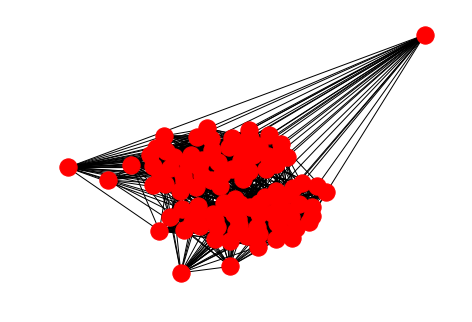

In [232]:
nx.draw(G)
plt.show()

In [143]:
M = to_numpy_matrix(G)
print(M)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  1.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]]


## Début du processus dynamique 

In [145]:
#Demande du temps d'etude

t = int(input('Temps t : '))


# Première étape : vérification de la commande

#Transmission de la maladie
for l in range(t):
    for i in range(len(M)):
        for j in range (i,len(M)):
            if np.asarray(M)[i][j] == 1:
                if Population[0][i] == 1 & Population[0][j] == 0:
                    if Population[1][j] == 0:
                        Population[0][j] = int(np.random.binomial(1,lmbda))
                if Population[0][i] == 0 & Population[0][j] == 1:
                    if Population[1][i] == 0:
                        Population[0][i] = int(np.random.binomial(1,lmbda))
#Possibilité d'une guérison sans vaccin
        if Population[0][i] == 1 & int(Tmalade[i]) != 0:
            Population[0][i] = int(np.random.binomial(1,1-eta))
            if Population[0][i] == 0:
                Population[1][i] = 1 
#Mise à jour des décès            
    death_row_node = []
    death_row_index = []
    v = 0
    for i in G.nodes():
        if int(Tmalade[v]) != 0:
            k = int(np.random.binomial(1,rho))
            if k == 1:
                death_row_node.append(i)
                death_row_index.append(v)
        v = v+1         
#Mise à jour de la base de données sur la convalescence.        
    for i in range(len(M)):
        if Population[0][i] == 1:
            Tmalade[i] += 1
        elif Population[0][i] == 0:
            Tmalade[i] = 0
#Mise à jour des matrices en tenant compte des décès          
    G.remove_nodes_from(death_row_node)
    death_row_index.reverse()
    for i in death_row_index:
        Population = np.delete(Population,(i), axis=1)
        Tmalade = np.delete(Tmalade,(i), axis=0) 
    M = to_numpy_matrix(G)

Temps t : 10


Ce que l'on pourrait ajouter à long-terme :

* Créer un tableau de fréquence de la population touchée par la maladie : OK (à améliorer)
    *  Prendre en compte le nombre de personnes qui a été contaminées en tout (proportion des gens qui ont, un moment donné, été malade pendant l'épidémie. Meilleur indicateur pour comprendre l'étendue de l'épidémie. Tout le monde sera guéri à LT dans ce modèle. Se référer au modèle du site interstice.

* Faire un réseau dynamique avec :
    * De nouveaux liens se créent ou se détruisent entre les personnes 
        * Des liens forts et des liens faibles (liens forts ne bougent pas, mais la probabilité de contamination reste pareille)
        * Mettre des probabilités différentes (liens fortes = probabilité plus forte de tomber malade).

* Modifier la formation du réseau 

# Deuxième partie : un modèle plus complexe

Choses à faire pour que le modèle soit dynamique :


* Créer de nouveaux graphes, plus en lien avec ce que l'on veut faire.
* Mettre tout ce qu'on a fait précédemment sous la forme d'arguments.


### Mise en place d'attributs

In [26]:
#Création des noeuds du réseau 

n = int(input('Taille de la population : '))
p_init = float(input ('Pourcentage initial de personnes contaminées : '))
lmbda = float(input('Contagiosité de la maladie : '))
mu = float(input('Poucentage de personnes vaccinées initialement : ')) 
eta = float(input('Probabilité que la personne guérisse sans vaccin : '))
rho = float(input('Probabilité de deces suite a la maladie : '))

G2 = nx.Graph()
G2.clear()

Taille de la population : 100
Pourcentage initial de personnes contaminées : 0.05
Contagiosité de la maladie : 0.3
Poucentage de personnes vaccinées initialement : 0.5
Probabilité que la personne guérisse sans vaccin : 0.2
Probabilité de deces suite a la maladie : 0.2


In [27]:
#Création du réseau d'individus


m = float(input ('Moyenne de la taille d un cluster : '))
p_intra = float(input ('Probabilité de créer des liens au sein des clusters : '))
p_inter = float(input('Probabilité de créer des liens entre les clusters : '))
v = float(input('Paramètre de taille (variance) : ')) 

G2 = nx.gaussian_random_partition_graph(n,m,v,p_intra,p_inter)


Moyenne de la taille d un cluster : 20
Probabilité de créer des liens au sein des clusters : 0.3
Probabilité de créer des liens entre les clusters : 0.005
Paramètre de taille (variance) : 400


In [28]:
G3 = nx.Graph.copy(G2)

In [29]:
#Mise en place des attributs pour chaque noeud (malade/pas malade initialement, vacciné/pas vacciné)
#Trouver un moyen de faire en sorte qu'on ne soit pas malade et contaminé en même temps

Populations = {k: {'malade': np.random.choice(["Oui", "Non"], p=[p_init, 1-p_init]), 'vacciné': np.random.choice(["Oui", "Non"], p=[mu, 1-mu]), 'temps malade': 0} for k in range(n)}

# Je crois avoir compris le problème du graphique et pourquoi toute la population est saine au temps 1 :
    # Le critère pour être sain c'est avoir 'temps malade' = 0, or au temps 1 tout le monde a 'temps malade' = 1
    # Il faut donc changer Populations et mettre 'temps malade' = 1 pour les individus malades au moment initial.
    
# Pour que les malades à l'origine ait 'temps malade' = 1 dès le début du processus"
for k in range(n):
    if Populations[k]['malade'] == 'Oui':
        Populations[k]['temps malade'] += 1
#Fin de la modification

print(Populations)



{0: {'malade': 'Non', 'vacciné': 'Oui', 'temps malade': 0}, 1: {'malade': 'Non', 'vacciné': 'Non', 'temps malade': 0}, 2: {'malade': 'Oui', 'vacciné': 'Non', 'temps malade': 1}, 3: {'malade': 'Non', 'vacciné': 'Oui', 'temps malade': 0}, 4: {'malade': 'Non', 'vacciné': 'Oui', 'temps malade': 0}, 5: {'malade': 'Non', 'vacciné': 'Non', 'temps malade': 0}, 6: {'malade': 'Non', 'vacciné': 'Non', 'temps malade': 0}, 7: {'malade': 'Non', 'vacciné': 'Oui', 'temps malade': 0}, 8: {'malade': 'Non', 'vacciné': 'Oui', 'temps malade': 0}, 9: {'malade': 'Non', 'vacciné': 'Non', 'temps malade': 0}, 10: {'malade': 'Non', 'vacciné': 'Oui', 'temps malade': 0}, 11: {'malade': 'Non', 'vacciné': 'Non', 'temps malade': 0}, 12: {'malade': 'Non', 'vacciné': 'Oui', 'temps malade': 0}, 13: {'malade': 'Non', 'vacciné': 'Oui', 'temps malade': 0}, 14: {'malade': 'Non', 'vacciné': 'Oui', 'temps malade': 0}, 15: {'malade': 'Non', 'vacciné': 'Oui', 'temps malade': 0}, 16: {'malade': 'Non', 'vacciné': 'Oui', 'temps ma

In [34]:
nx.set_node_attributes(G3,Populations)
# Necessité de mettre à jour Networkx

TypeError: set_node_attributes() missing 1 required positional argument: 'values'

C:\Users\Vincent\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Vincent\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Vincent\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Vincent\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be re

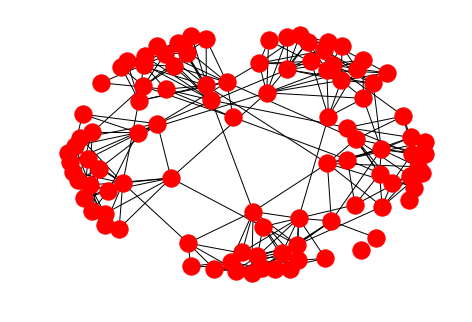

In [31]:
nx.draw(G3)
plt.show()

In [32]:
# Première étape : vérification de la commande

#Transmission de la maladie
def transmission_maladie (G, lmbda):
    for lien in G.edges(): # G.edges est l'ensemble des relations entre deux noeuds. 
        if (G.nodes[lien[0]]['malade'] == 'Oui') & (G.nodes[lien[1]]['malade'] == 'Non'): 
            if G.nodes[lien[1]]['vacciné'] == 'Non':
                G.nodes[lien[1]]['malade'] = np.random.choice(['Oui', 'Non'], p=[lmbda, 1-lmbda])
        elif (G.nodes[lien[0]]['malade'] == 'Non') & (G.nodes[lien[1]]['malade'] == 'Oui'):
            if G.nodes[lien[0]]['vacciné'] == 'Non':
                G.nodes[lien[0]]['malade'] = np.random.choice(['Oui', 'Non'], p=[lmbda, 1-lmbda])
# lien[0] est le 1er individu dans la relation et lien[1] le deuxième

# Guérir de la malade
def guerison_maladie (G, eta, Pop_retablie):
    sante = nx.get_node_attributes(G, 'malade') # Pourquoi c'est pas G au lieu de G3 ici ?
    for noeud in [k for k,v in sante.items() if v == 'Oui']:
        if G.nodes[noeud]['temps malade'] != 0:
            G.nodes[noeud]['malade'] = np.random.choice(['Oui', 'Non'], p=[1-eta, eta])
            if G.nodes[noeud]['malade'] == 'Non':
                G.nodes[noeud]['vacciné'] = 'Oui'
    sante2 = nx.get_node_attributes(G, 'malade') # Pourquoi c'est pas G au lieu de G3 ici ?
    Pop_retablie.append(len([k for k,v in sante2.items() if v == 'Non'])-len([k for k,v in sante.items() if v == 'Non']))
                        
# Mourir de la maladie                 
def deces (G,rho,Pop_tot):
    convalescence = nx.get_node_attributes(G, 'temps malade') # Pourquoi c'est pas G au lieu de G3 ici ?
    for noeud in [k for k,v in convalescence.items() if v != 0]:
        l = int(np.random.binomial(1,rho))
        if l == 1:
            G.remove_node(noeud)
    Pop_tot.append(len(G.nodes()))
    
# Mise à jour du temps passé malade

def temps_malade (G, Pop_malade_t,Pop_saine):
    sante = nx.get_node_attributes(G, 'malade') # Pourquoi c'est pas G au lieu de G3 ici ?
    convalescence = nx.get_node_attributes(G, 'temps malade') # Pourquoi c'est pas G au lieu de G3 ici ?
    for noeud in [k for k,v in sante.items() if v == 'Oui']:
        G.nodes[noeud]['temps malade'] += 1    
    Pop_malade_t.append(len([k for k,v in sante.items() if v == 'Oui']))
    Pop_saine.append(len(G.nodes())-len([k for k,v in convalescence.items() if v != 0]))

In [33]:
#Demande du temps d'etude

t = int(input('Temps t : '))

M = nx.get_node_attributes(G3, 'malade')
Pop_malade_0 = len([k for k,v in M.items() if v == 'Oui'])
Pop_tot = [n]
Pop_malade_t = [Pop_malade_0]
Pop_saine = [n-Pop_malade_0]
Pop_retablie = [0]
Temps = [0]

for j in range(t):
    transmission_maladie(G3, lmbda)
    guerison_maladie(G3, eta,Pop_retablie)
    deces(G3,rho,Pop_tot)
    temps_malade(G3,Pop_malade_t,Pop_saine)
    Temps.append(j+1)

Temps t : 20


TypeError: 'method' object is not subscriptable

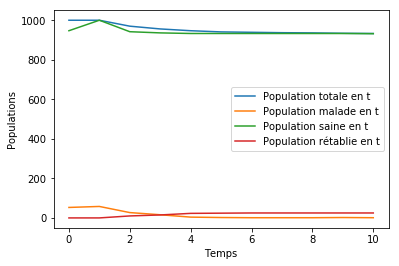

In [174]:
# Graphique représentant les différentes populations en t pour une maladie et un taux de couverture donné

x = np.array(Temps)
y1 = np.array(Pop_tot)
y2 = np.array(Pop_malade_t)
y3 = np.array(Pop_saine)
y4 = np.cumsum(Pop_retablie)
plt.plot(x, y1, label="Population totale en t")
plt.plot(x, y2, label="Population malade en t")
plt.plot(x, y3, label="Population saine en t")
plt.plot(x, y4, label="Population rétablie en t")

#Légendes sur les axes
plt.xlabel("Temps")
plt.ylabel("Populations")

plt.legend()
plt.show()

### Taux de vaccination idéale pour une maladie donnée



In [37]:
# Création de la liste des taux de vaccination possibles
range_mu = []
for i in range(101):
    range_mu.append(i/100)
print(range_mu)

range_mu_simple = []
for i in range(11):
    range_mu_simple.append(i/10)
print(range_mu_simple)

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


In [ ]:

# Les caractéristiques de la maladie
lmbda = float(input('Contagiosité de la maladie : '))
eta = float(input('Probabilité que la personne guérisse sans vaccin : '))
rho = float(input('Probabilité de deces suite a la maladie : '))

# Autres paramètres
p_init = float(input ('Pourcentage initial de personnes contaminées : ')) # Convention à 0.05 ?
t = int(input('Le nombre de Temps t que dure l épidémie : ')) # Convention à 20 ? 

# On suppose que l'on a un réseau G2, ce sera le même réseau de base tout du long du test.

# Initialisation de la récolte statistique
pourcent_morts = [] # le % de morts en moyenne après une épidémie d'une maladie donnée en fonction du taux de vaccination
pourcent_malades = [] # le % de personnes tombées malades en moyenne au cours d'une épidémie d'une maladie donnée en fonction du taux de vaccination

for mu in range_mu_simple: # ou alors "range_mu"
    
    # Initialisation de la récolte statistiques intermédiaire
    pourcent_morts_mu = [] # pour un mu donné, c'est la liste des résultats des 10 tests effectués avec le même mu
    pourcent_malades_mu = [] # pour un mu donné, c'est la liste des résultats des 10 tests effectués avec le même mu
    
    for i in range(10):
        
        #réinitialiser le réseau
        G3 = nx.Graph.copy(G2)
        
        #Création d'une populations
        Populations = {k: {'malade': np.random.choice(["Oui", "Non"], p=[p_init, 1-p_init]), 'vacciné': np.random.choice(["Oui", "Non"], p=[mu, 1-mu]), 'temps malade': 0} for k in range(n)}
        # Attention au "range(n)" de Populations ==> faire en sorte que ce soit bien le même n qui a créé le réseau que l'on utilise
        # Pour que les malades à l'origine ait 'temps malade' = 1 dès le début du processus"
        for k in range(n):
            if Populations[k]['malade'] == 'Oui':
                Populations[k]['temps malade'] += 1
        #Fin de la modification
        
        #Application des caractéristiques de la nouvelle population au réseau qui, lui, reste constant
        nx.set_node_attributes(G3,Populations)
        
        # processus dynamique
        M = nx.get_node_attributes(G3, 'malade')
        Pop_malade_0 = len([k for k,v in M.items() if v == 'Oui'])
        Pop_tot = [n]
        Pop_malade_t = [Pop_malade_0]
        Pop_saine = [n-Pop_malade_0]
        Pop_retablie = [0]
        Temps = [0]

        for j in range(t):
            transmission_maladie(G3, lmbda)
            guerison_maladie(G3, eta,Pop_retablie)
            deces(G3,rho,Pop_tot)
            temps_malade(G3,Pop_malade_t,Pop_saine)
            Temps.append(j+1)
            
    # Mise à jour des statistiques : récolte de l'information sur le nombre de malades totales au cours de l'épidémie
    # On récolte aussi le nombre de morts au cours de l'épidémie
        pourcent_morts_mu.append((n-len(G3.nodes()))/n)
        pourcent_malades_mu.append((n-Pop_saine[t-1])/n)
        
    pourcent_morts.append(sum(pourcent_morts_mu)/len(pourcent_morts_mu))
    pourcent_malades.append(sum(pourcent_malades_mu)/len(pourcent_malades_mu))

In [38]:
# Création du graphique : % de morts et % de malades au cours d'une épidémie d'une maladie donnée en fonction du taux de vaccination

x = np.array(range_mu_simple) # ou "range_mu"
y1 = np.array(pourcent_morts)
y2 = np.array(pourcent_malades)
plt.plot(x, y1, label="Population décédée au cours de l'épidémie")
plt.plot(x, y2, label="Population malade au cours de l'épidémie")

#Légendes sur les axes
plt.xlabel("Taux de vaccination")
plt.ylabel("Pourcentage")

plt.legend()
plt.show()

6